# Simulation Results

This notebook will teach how to viasualize and extract results from the MobsPy simulation object.

We start with a simple model:

Compiling model
Starting Simulator
Running simulation in parallel
Simulation is Over


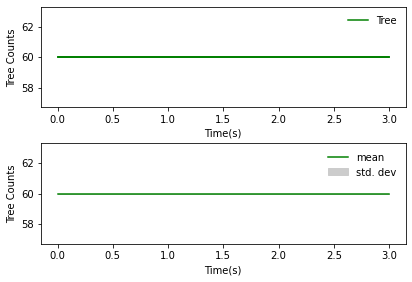

In [1]:
from mobspy import *

Color, Disease = BaseSpecies()

Color.blue, Color.red, Color.yellow
Disease.not_sick, Disease.sick

Disease.not_sick >> Disease.sick [1]

Tree = Color*Disease

Tree.yellow(20), Tree.red(20), Tree.blue(20)

S = Simulation(Tree)
S.method = 'stochastic'
S.repetitions = 3
S.step_size = 0.25
S.duration = 3
S.run()

The previous plot did not show much as the number of Trees remains constant throughout the simulation.
However, MobsPy provides tools to better viasualize the results. Firstly, one can use the plot_stochastic() function with perform string queries to plot the counts from specific states.

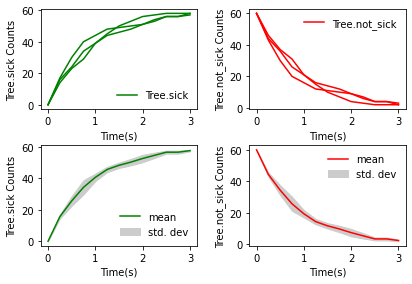

In [2]:
S.plot_stochastic(Tree.not_sick, Tree.sick)

Plot stochastic generates two figures for each species. The figures above refer to the runs, while the figures bellow refer to an average of the runs with the standard deviation.

If one wishes to see all species together, one can use the plot function.

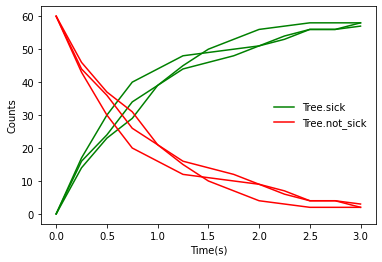

In [3]:
S.plot(Tree.not_sick, Tree.sick)

One can also access the data directly using either the meta-species objects or strings. 
Similarly to the plotting function you can perform queries in the result data.

In [4]:
R = S.results
print('Tree: \n', R[Tree])
print('Tree.not_sick: \n', R[Tree.not_sick])
print('Tree.sick: \n', R['Tree.sick'])
print('Tree.sick.blue: \n', R['Tree.sick.blue'])

Tree: 
 [[60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0], [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0], [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0]]
Tree.not_sick: 
 [[60.0, 44.0, 36.0, 26.0, 21.0, 15.0, 10.0, 7.0, 4.0, 3.0, 2.0, 2.0, 2.0], [60.0, 46.0, 37.0, 31.0, 21.0, 16.0, 14.0, 12.0, 9.0, 6.0, 4.0, 4.0, 3.0], [60.0, 43.0, 30.0, 20.0, 16.0, 12.0, 11.0, 10.0, 9.0, 7.0, 4.0, 4.0, 2.0]]
Tree.sick: 
 [[0.0, 16.0, 24.0, 34.0, 39.0, 45.0, 50.0, 53.0, 56.0, 57.0, 58.0, 58.0, 58.0], [0.0, 14.0, 23.0, 29.0, 39.0, 44.0, 46.0, 48.0, 51.0, 54.0, 56.0, 56.0, 57.0], [0.0, 17.0, 30.0, 40.0, 44.0, 48.0, 49.0, 50.0, 51.0, 53.0, 56.0, 56.0, 58.0]]
Tree.sick.blue: 
 [[0.0, 6.0, 9.0, 13.0, 15.0, 18.0, 19.0, 19.0, 20.0, 20.0, 20.0, 20.0, 20.0], [0.0, 4.0, 8.0, 9.0, 12.0, 12.0, 14.0, 14.0, 15.0, 17.0, 19.0, 19.0, 20.0], [0.0, 2.0, 5.0, 8.0, 10.0, 13.0, 14.0, 15.0, 15.0, 15.0, 16.0, 16.0, 18.0]]


If the simulation has more than one repetition the results requested for a species will yield all runs packed in a list. However, if a simulation has only one run it will return a single list. 

Compiling model
Starting Simulator
Running simulation in parallel
Simulation is Over


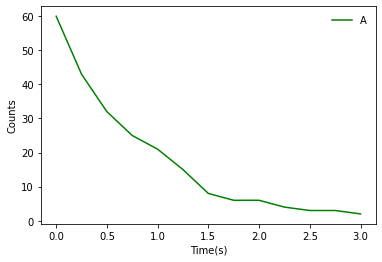

In [9]:
A = BaseSpecies()

A >> Zero [1]

A(60)
S_one_run = Simulation(A)
S_one_run.method = 'stochastic'
S_one_run.step_size = 0.25
S_one_run.duration = 3
S_one_run.run()

In [10]:
print(S_one_run.results[A])

[60.0, 43.0, 32.0, 25.0, 21.0, 15.0, 8.0, 6.0, 6.0, 4.0, 3.0, 3.0, 2.0]


## Looping over data

Looping through results changes for simulations with multiple repetitions and simulations with a single repetition.
If there is a single repetition a loop through the results will yield all the meta-species and if there are multiple repetations a loop through the results will yield each time-series.

In [15]:
print('Single repetition: ')
for e in S_one_run.results:
    print(e)
print()

print('Multiple repetitions: ')
for e in S.results:
    print(e)

Single repetition: 
A
Time

Multiple repetitions: 
{'Tree.red.not_sick': [20.0, 17.0, 15.0, 10.0, 9.0, 6.0, 2.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'Tree.yellow.not_sick': [20.0, 13.0, 10.0, 9.0, 7.0, 7.0, 7.0, 4.0, 3.0, 3.0, 2.0, 2.0, 2.0], 'Tree.blue.not_sick': [20.0, 14.0, 11.0, 7.0, 5.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Tree.yellow.sick': [0.0, 7.0, 10.0, 11.0, 13.0, 13.0, 13.0, 16.0, 17.0, 17.0, 18.0, 18.0, 18.0], 'Tree.red.sick': [0.0, 3.0, 5.0, 10.0, 11.0, 14.0, 18.0, 18.0, 19.0, 20.0, 20.0, 20.0, 20.0], 'Tree.blue.sick': [0.0, 6.0, 9.0, 13.0, 15.0, 18.0, 19.0, 19.0, 20.0, 20.0, 20.0, 20.0, 20.0], 'Tree': [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0], 'Time': [0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0]}
{'Tree.red.not_sick': [20.0, 12.0, 10.0, 6.0, 5.0, 4.0, 4.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0], 'Tree.yellow.not_sick': [20.0, 18.0, 15.0, 14.0, 8.0, 4.0, 4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0], 'Tree.blue.not_sick': [20.0